In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
train_data = pd.read_csv('train.csv', sep=',', header=0)
print(train_data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [23]:
# separate data and the labels
# split = int(train_data.shape[0] * .75)
# val_split = train_data.shape[0]  - split
# print(split)
# print(val_split)

images = train_data.iloc[:, 1:].values
labels = np.array(train_data.iloc[:, 0].values)
print(images)
print(labels)


# val_images = train_data.iloc[val_split:, 1:].values
# val_labels = train_data.iloc[val_split:, 0].values

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [24]:
width = 28
height = 28

In [25]:
images = images.reshape(len(labels), width, height, 1)
images = images / 255
# print(np.shape(X))

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset.shuffle(buffer_size=1000).batch(32)


<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [26]:
def visualize(image):
    image = image.reshape(width, height)
    plt.imshow(image)

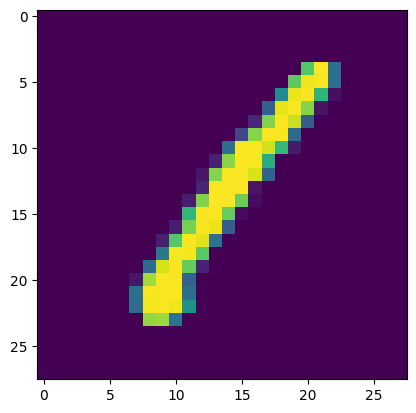

In [27]:
visualize(images[0, :])

(28000, 28, 28, 1)


<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None)>

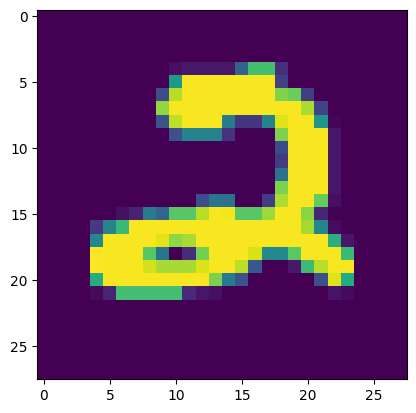

In [28]:
# process test data
test_dataframe = pd.read_csv('test.csv', sep=',')
# print(test_dataframe)


test_images = test_dataframe.iloc[:, :].values

visualize(test_images[0, :])

test_images = test_images.reshape(-1, width, height, 1)
test_images = test_images / 255
print(test_images.shape)

test_dataset = tf.data.Dataset.from_tensor_slices(test_images)
test_dataset.shuffle(buffer_size=1000).batch(32)


In [29]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\ekamr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile('adam', loss=keras.losses.CategoricalCrossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,033 (54.82 KB)

 Trainable params: 14,033 (54.82 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# hist = model.fit(images, labels, epochs=20, validation_data=(val_images, val_labels))
hist = model.fit(dataset, epochs=20, validation_freq=.20)

Epoch 1/20


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 3 from 1 for '{{node sequential_2_1/conv2d_4_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_2_1/ExpandDims, sequential_2_1/conv2d_4_1/convolution/ReadVariableOp)' with input shapes: [28,28,1,1], [3,3,1,16].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(28, 28, 1, 1), dtype=float32)

In [ ]:
def plot_loss(hist):
    fig = plt.figure()
    plt.plot(hist.history['loss'], color='teal', label='loss')
    plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
def plot_accuracy(hist):
    fig = plt.figure()
    plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
    plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.show()



In [ ]:
plot_accuracy(hist)
plot_loss(hist)

In [ ]:
# test_loss, test_accuracy = model.evaluate(val_images, val_labels)
predictions = model.predict(test_dataset)
print(predictions.shape)
print(predictions)

In [ ]:
def predict_number(prediction):
    number = np.argmax(prediction)
    print("The number is: " + number)